O dataset com as alterações de encoding e isso é o da semana passada.

## Sampling Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from pandas import Series, concat, DataFrame
from imblearn.over_sampling import SMOTE
RANDOM_STATE = 42

In [2]:
data_path='../datasets/Processed_Datasets/encoded_clean_diabetes.csv'
data=pd.read_csv(data_path)

class_var = 'readmitted'

In [3]:
data.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted', 'race', 'gender', 'age', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'acetohexamide', 'tolbutamide', 'troglitazone',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')

In [4]:
y=data[class_var]

Text(0.5, 1.0, 'Imbalanced Dataset')

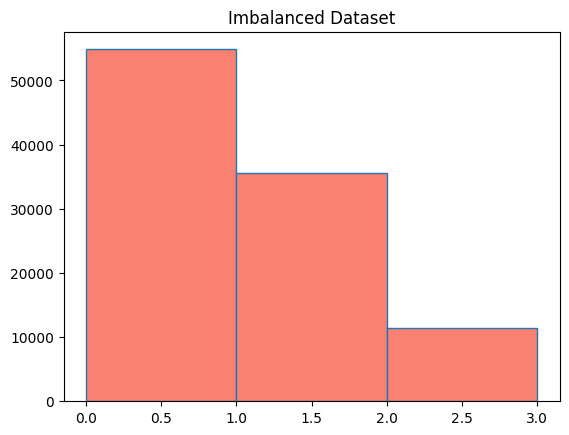

In [5]:
fig=plt.figure()
y.hist(bins=[0, 1, 2, 3], grid=False, edgecolor='C0', color='salmon')
plt.title('Imbalanced Dataset')

# Descrição geral

Dado o Dataset não ser equilibrado, são testadas 3 técnicas distintas. Undersampling, Oversampling e SMOTE 

In [6]:
original=data.copy()

target_count = original[class_var].value_counts()

positive_class = target_count.idxmin()
middle_class   = 1
negative_class = target_count.idxmax()

#ind_positive_class = target_count.index.get_loc(positive_class)
print('Minority class=', positive_class, ':', target_count[positive_class])
print('Minority class=', middle_class, ':', target_count[middle_class])
print('Majority class=', negative_class, ':', target_count[negative_class])

values = {'Original': [target_count[positive_class], target_count[negative_class]]}

Minority class= 2 : 11357
Minority class= 1 : 35545
Majority class= 0 : 54864


## Under & Over Sampling

Consideram-se a classe em maioria e minoria. Quando fazemos oversampling, duplicamos dados nas classes em minoria, até ambas terem o mesmo número de pontos que a classe em maioria.
Quando aplicamos undersampling, retiramos dados as classes em maioria, até terem a mesma dimensão que a classe em minoria.

In [8]:
df_positives = original[original[class_var] == positive_class]
df_middle    = original[original[class_var] == middle_class]
df_negatives = original[original[class_var] == negative_class]

In [10]:
# UNDERSAMPLING

df_neg_sample = DataFrame(df_negatives.sample(len(df_positives)))
df_mid_sample = DataFrame(df_middle.sample(len(df_positives)))
df_under = concat([df_positives, df_mid_sample, df_neg_sample], axis=0)
df_under.to_csv(f'under_sampling.csv', index=False)

values['UnderSample'] = [len(df_positives), len(df_mid_sample), len(df_neg_sample)]

print('Minority class=', positive_class, ':', len(df_positives))
print('Minority class=', middle_class, ':', len(df_mid_sample))
print('Majority class=', negative_class, ':', len(df_neg_sample))

Minority class= 2 : 11357
Minority class= 1 : 11357
Majority class= 0 : 11357


In [71]:
# OVERSAMPLING

df_pos_sample = DataFrame(df_positives.sample(len(df_negatives), replace=True))
df_mid_sample = DataFrame(df_middle.sample(len(df_negatives), replace=True))
df_over = concat([df_pos_sample, df_mid_sample, df_negatives], axis=0)
df_over.to_csv(f'over_sampling.csv', index=False)

values['OverSample'] = [len(df_pos_sample), len(df_mid_sample), len(df_negatives)]

print('Minority class=', positive_class, ':', len(df_pos_sample))
print('Minority class=', middle_class, ':', len(df_mid_sample))
print('Majority class=', negative_class, ':', len(df_negatives))

Minority class= 2 : 54864
Minority class= 2 : 54864
Majority class= 0 : 54864


## SMOTE

In [57]:
original=data.copy()

In [69]:
smote = SMOTE(sampling_strategy='auto', random_state=RANDOM_STATE)
y = original.pop(class_var).values
X = original.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(original.columns) + [class_var]
df_smote.to_csv(f'smote.csv', index=False)

smote_target_count = Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count[positive_class], smote_target_count[negative_class]]
print('Minority class=', positive_class, ':', smote_target_count[positive_class])
print('Minority class=', middle_class  , ':', smote_target_count[middle_class])
print('Majority class=', negative_class, ':', smote_target_count[negative_class])

Minority class= 2 : 54864
Minority class= 1 : 54864
Majority class= 0 : 54864
